In [57]:
import tensorflow as tf
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from sklearn.metrics import confusion_matrix

In [58]:
train_data = pd.read_csv("./mnist_train.csv")

In [59]:
test_data = pd.read_csv("./mnist_test.csv")

In [60]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
train_data.shape

(60000, 785)

In [63]:
test_data.shape

(10000, 785)

In [64]:
x_train = train_data.drop(labels=["label"],axis=1)/255
y_train = train_data["label"]
x_test = test_data.drop(labels=["label"],axis=1)/255
y_test = test_data["label"]

In [65]:
print(x_train)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
59995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
59999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

       28x21  28x22  28x23  28x24  28x25  28x26  28

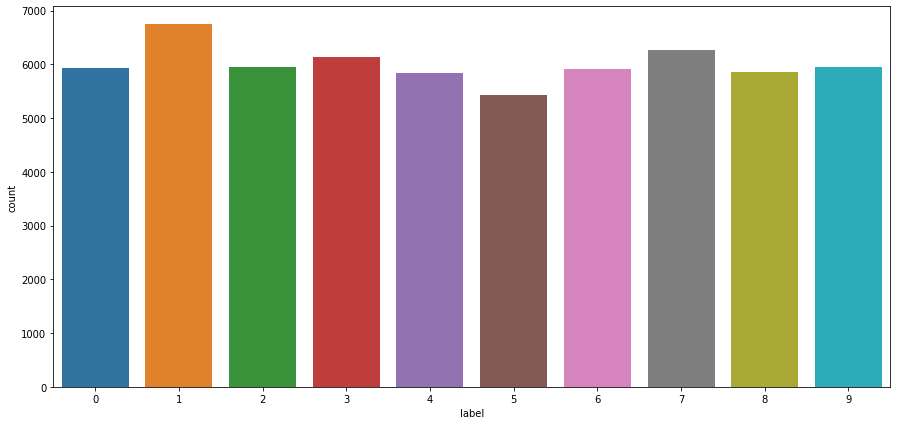

In [66]:
 plt.figure(figsize = (15,7))
g = sns.countplot(y_train)

In [67]:
#normalize data (x values)
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [68]:
x_test = tf.keras.utils.normalize(x_test, axis=1)

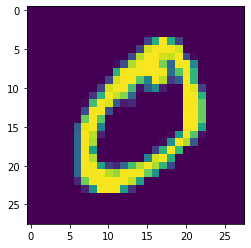

In [69]:
img = x_train.iloc[1].values.reshape(28,28)
img.shape
plt.imshow(img)
plt.show()

In [70]:
#resize image for cNN
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [71]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(128,activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [72]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4260 - accuracy: 0.8902 - val_loss: 0.2388 - val_accuracy: 0.9318
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2164 - accuracy: 0.9376 - val_loss: 0.1840 - val_accuracy: 0.9461
Epoch 3/5
1875/1875 [==============================] - 2s 923us/step - loss: 0.1617 - accuracy: 0.9531 - val_loss: 0.1422 - val_accuracy: 0.9583
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1252 - accuracy: 0.9633 - val_loss: 0.1177 - val_accuracy: 0.9666
Epoch 5/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.1011 - accuracy: 0.9703 - val_loss: 0.1005 - val_accuracy: 0.9707


In [97]:
model.save('model.h5')

In [98]:
print(model.evaluate(x_test,y_test))
#gives loss and accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.1005 - accuracy: 0.9707
[0.1004541665315628, 0.9707000255584717]


In [99]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
y_pred

array([[1.57022043e-06, 6.08698514e-09, 6.12491203e-05, ...,
        9.99210119e-01, 3.47055447e-06, 2.67597243e-05],
       [3.36692901e-05, 1.53357373e-03, 9.94731545e-01, ...,
        4.83747487e-10, 9.95734663e-05, 4.99168040e-10],
       [5.03341312e-07, 9.97057080e-01, 1.06903887e-03, ...,
        1.23453373e-03, 3.72317416e-04, 3.72234649e-06],
       ...,
       [4.98112263e-09, 1.03118722e-07, 1.10906164e-07, ...,
        3.41663945e-05, 1.33994996e-04, 1.26478984e-03],
       [1.45793629e-05, 1.25360123e-06, 8.94196944e-07, ...,
        6.24686663e-07, 1.18487794e-03, 5.52042707e-07],
       [5.91247772e-05, 3.39488899e-08, 1.33966634e-04, ...,
        1.74050129e-07, 1.15273201e-06, 6.02763578e-07]], dtype=float32)

In [100]:
num = input("Enter name of image:")

Enter name of image:9


In [101]:
num

'9'

The number is likely: 9


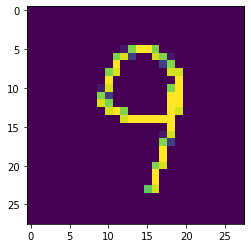

In [102]:
img = cv.imread('{}.png'.format(int(num)))[:,:,0] #read in image
img = np.invert(np.array([img]))
prediction = model.predict(img)
print("The number is likely: {}".format(np.argmax(prediction)))
plt.imshow(img[0])
plt.show()